Loading Golden Data...
Training Data Shape: (2188, 9)
Testing Data Shape:  (548, 9)
Model Selected: RandomForestRegressor(max_depth=7, random_state=42)

Training the model... Please wait.
Training Complete! ✅

----------------------------------
MODEL PERFORMANCE REPORT
----------------------------------
Accuracy (R2 Score): 97.89%
Avg Error (MAE):     847.67
----------------------------------


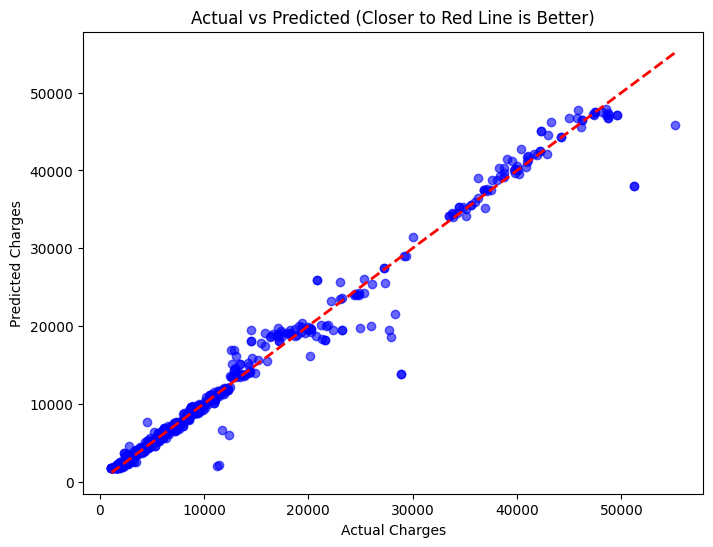

Winner Model saved successfully at: ../models/champion_random_forest.pkl


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error
import joblib

# --------------------------------------------------------
# 1. LOAD THE GOLDEN DATA
# --------------------------------------------------------
# We use the processed data directly. No need to clean again.
print("Loading Golden Data...")
X_train = pd.read_csv('../data/X_train.csv')
X_test = pd.read_csv('../data/X_test.csv')
y_train = pd.read_csv('../data/y_train.csv').values.ravel()
y_test = pd.read_csv('../data/y_test.csv').values.ravel()

print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape:  {X_test.shape}")

# --------------------------------------------------------
# 2. DEFINE YOUR MODEL
# --------------------------------------------------------
# Import
from sklearn.ensemble import RandomForestRegressor
# Define
model = RandomForestRegressor(n_estimators=100, max_depth=7 , random_state=42)


print(f"Model Selected: {model}")

# --------------------------------------------------------
# 3. TRAIN THE MODEL
# --------------------------------------------------------
print("\nTraining the model... Please wait.")
model.fit(X_train, y_train)
print("Training Complete! ✅")

# --------------------------------------------------------
# 4. EVALUATE PERFORMANCE
# --------------------------------------------------------
# Predict on Test Data (The Exam)
y_pred = model.predict(X_test)

# Calculate Scores
accuracy = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("\n----------------------------------")
print(f"MODEL PERFORMANCE REPORT")
print("----------------------------------")
print(f"Accuracy (R2 Score): {accuracy * 100:.2f}%")
print(f"Avg Error (MAE):     {mae:.2f}")
print("----------------------------------")


# --------------------------------------------------------
# 5. VISUALIZE RESULTS
# --------------------------------------------------------
# A perfect prediction would fall on the Red Line.
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted (Closer to Red Line is Better)')
plt.show()

# --------------------------------------------------------
# 6. SAVE YOUR MODEL (Optional)
# --------------------------------------------------------
final_model_variable = model
final_save_path = '../models/champion_random_forest.pkl'

joblib.dump(final_model_variable, final_save_path)
print(f"Winner Model saved successfully at: {final_save_path}")